<a href="https://colab.research.google.com/github/NgansopToukam/Fashiomnist/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.15.0
4422102/4422102 [==============================] - 0s 0us/step
Dimensions de l'ensemble d'entraînement - Images: (60000, 28, 28) Labels: (60000,)
Dimensions de l'ensemble de test - Images: (10000, 28, 28) Labels: (10000,)
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4964 - accuracy: 0.8260 - val_loss: 0.4456 - val_accuracy: 0.8362
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3733 - accuracy: 0.8662 - val_loss: 0.4061 - val_accuracy: 0.8530
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3359 - accuracy: 0.8779 - val_loss: 0.3601 - val_accuracy: 0.8677
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3109 - accuracy: 0.8861 - val_loss: 0.3430 - val_accuracy: 0.8776
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2946 - accuracy: 0.8907 - val_loss: 0.3423 - val_accuracy: 0.8786
Epoch 6/10
1875/1875 [=============================

4

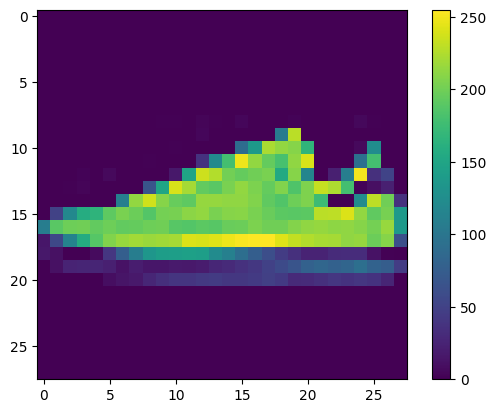

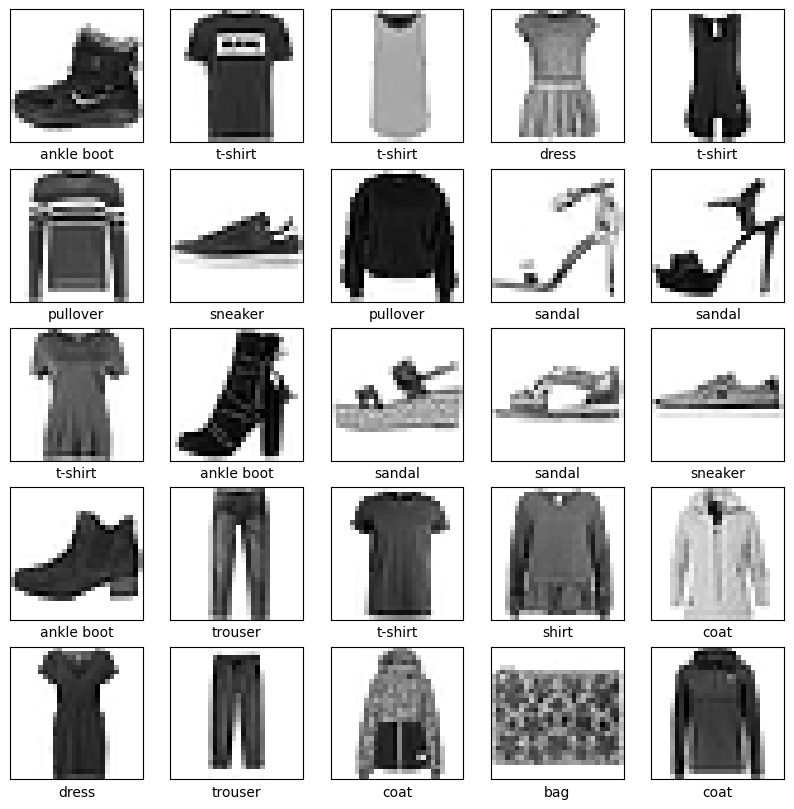

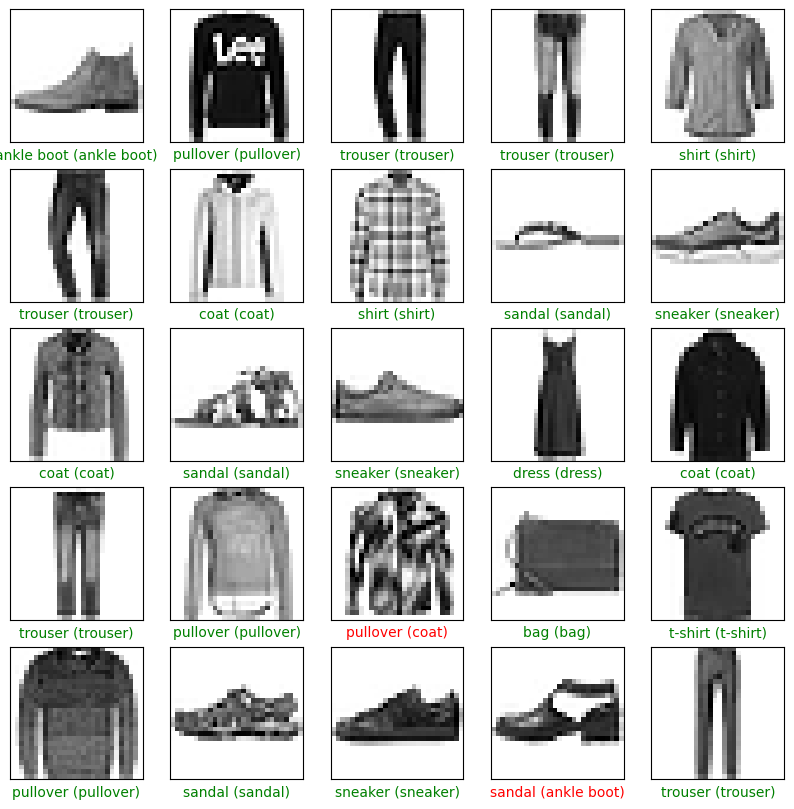

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
# Charger la base de données Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data(
)

class_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement - Images:", train_images.shape, "Labels:", train_labels.shape)
print("Dimensions de l'ensemble de test - Images:", test_images.shape, "Labels:", test_labels.shape)

#first image
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.gca().grid(False)

train_images = train_images / 255.0
test_images = test_images / 255.0
#by NPAT
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Assuming you are using TensorFlow 2.x
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
# Évaluer la performance du modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Afficher les résultats
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

predictions = model.predict(test_images)
predictions[6]
print(np.argmax(predictions[6]))
test_labels[6]

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                                  class_names[true_label]),
                                  color=color)


img = test_images[6]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions = model.predict(img)
print(predictions)

prediction = predictions[0]
np.argmax(prediction)

